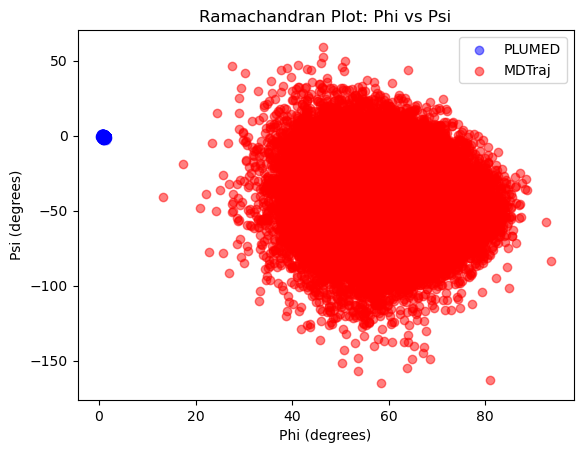

Standard deviation of Phi (COLVAR): 0.13 degrees
Standard deviation of Psi (COLVAR): 0.34 degrees
Standard deviation of Phi (MDTraj): 7.58 degrees
Standard deviation of Psi (MDTraj): 19.74 degrees


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the COLVAR file using NumPy
# Assuming the COLVAR file has the phi and psi columns, starting from the second column
data = np.loadtxt('COLVAR DialB', comments='#')

# Extract phi and psi from the COLVAR file (adjust column indices if necessary)
phi_colvar = data[:, 1]  # Second column is phi
psi_colvar = data[:, 2]  # Third column is psi

import mdtraj as md

# Load the trajectory and topology files
traj = md.load('traj_comp.xtc', top='dialB.pdb')

# Compute the phi and psi dihedral angles using MDTraj
phi_mdtraj = md.compute_phi(traj)[1]  # [0] gives the atom indices, [1] gives the values
psi_mdtraj = md.compute_psi(traj)[1]

# Convert the radians to degrees for consistency with PLUMED
phi_mdtraj_deg = np.degrees(phi_mdtraj)
psi_mdtraj_deg = np.degrees(psi_mdtraj)

# Plot Ramachandran plot of phi vs psi from PLUMED data
plt.scatter(phi_colvar, psi_colvar, c='blue', label='PLUMED', alpha=0.5)

# Plot phi vs psi from MDTraj data
plt.scatter(phi_mdtraj_deg, psi_mdtraj_deg, c='red', label='MDTraj', alpha=0.5)

# Add labels and title
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Ramachandran Plot: Phi vs Psi')
plt.legend()
plt.show()

# Compute the standard deviation of phi and psi from COLVAR (PLUMED data)
phi_std_colvar = np.std(phi_colvar)
psi_std_colvar = np.std(psi_colvar)

print(f"Standard deviation of Phi (COLVAR): {phi_std_colvar:.2f} degrees")
print(f"Standard deviation of Psi (COLVAR): {psi_std_colvar:.2f} degrees")

# Alternatively, compute from MDTraj data if preferred
phi_std_mdtraj = np.std(phi_mdtraj_deg)
psi_std_mdtraj = np.std(psi_mdtraj_deg)

print(f"Standard deviation of Phi (MDTraj): {phi_std_mdtraj:.2f} degrees")
print(f"Standard deviation of Psi (MDTraj): {psi_std_mdtraj:.2f} degrees")
